# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px; width: 1200px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3">
<br />
Название, краткое вступление в работу и главная задача зафиксированы. 
        
Четкий план работ и перечень основных задач позволит коллегам быстрее вникнуть в суть проекта, + будет легче  идти к главной цели проекта

<br /><font size="4" color = skyblue><b>✍ Комментарий Студента</b>
<br />Добавлен план работы над проектом
</font>

<font color = skyblue><list>
План анализа:
1. **Знакомство с данными**
   1. Загрузка и оценка первых строк дата сета
   2. Постройка гистограмм данных
   3. Оценка количества данных и типов
   4. Оценка количества пропусков
   5. Анализ типов данных
2. **Предобработка данных**
   1. Поиск и обработка пропусков
   2. Обработка типов данных
   3. Поиск и обработка явных и неявных дубликатов
   4. Отброс аномально высоких и низких значений
3. **Анализ взаимосвязей**
4. **Выполнение дополнительных заданий**


In [2]:
# 0.1 Импорт библиотек

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik.report import plot_correlation_matrix
from phik import report
import warnings
from IPython.core.display import HTML

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

<div class="alert-warning", style="border:solid coral 3px; padding: 20px; width: 1200px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3">
<br />стоит делить блок загрузки библиотек и код загрузки датасета, в случае необходимости добавления новых библиотек не придется загружать весь датасет заново и перезапускать проект целиком

<br /><font size="4" color = skyblue><b>✍ Комментарий Студента</b>
<br />Блоки разделены
</font>


<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px; width: 1200px">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3">
<br /> в сетевой версии данные не загружены
    
часть библиотек не загружается
        
        from statistics import correlation

<br /><font size="4" color = skyblue><b>✍ Комментарий Студента</b>
<br />Добавлен метод try с веб ссылкой на датафрейм
</font>

In [3]:
# 1.1 Загрузка датасета

try: 
    df = pd.read_csv('./datasets/real_estate_data.csv', sep = '\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<font color = skyblue><list>
* В Датасете 22 столбца
* Уже в первых строках видны пропуски данных
* Названия населенных пунктов необходимо будет очистить от ненужных слов
* Загрузка прошла успешно <br />
Оценим типы данных для каждого столбца

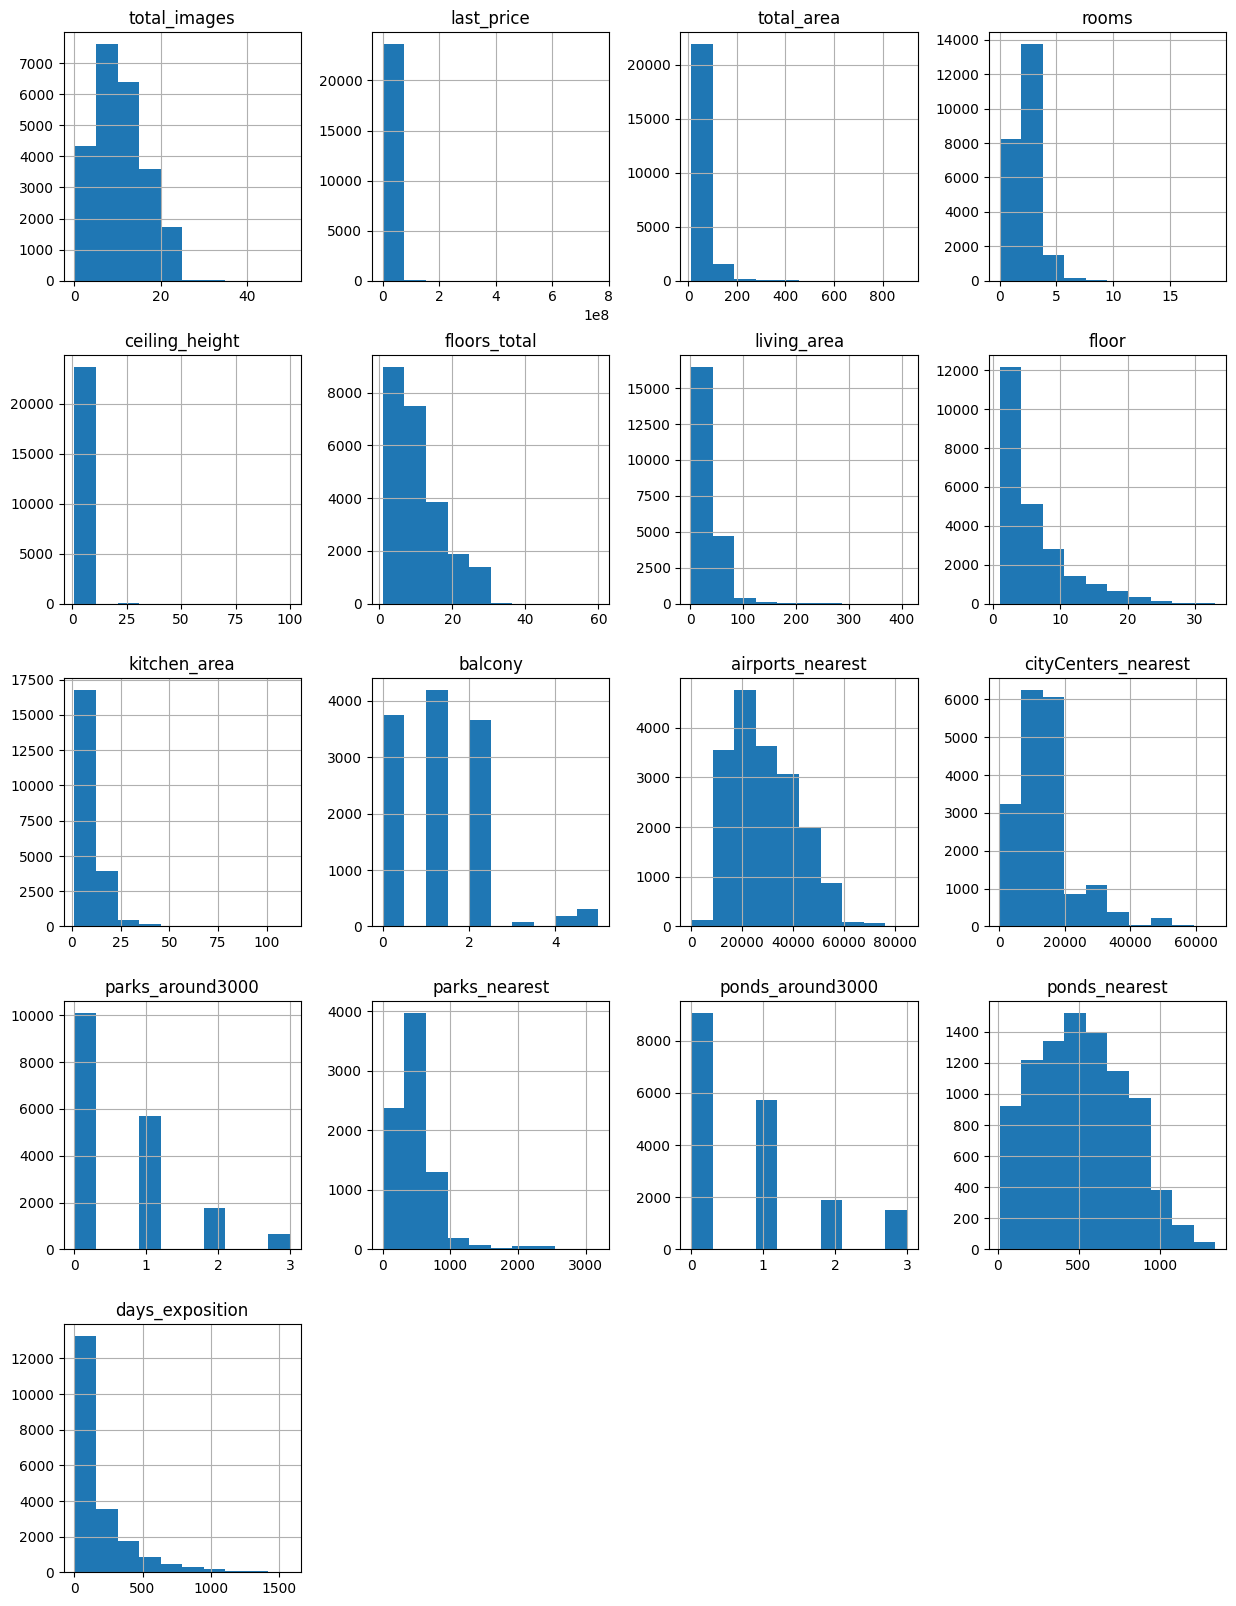

In [40]:
#1.2 Гистограммы данных
df.hist(figsize=(15, 20))
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<font color = skyblue><list>
* Нужно будет заменить дату публикации.
* floors_total - тип данных float, необходимо будет проверить значения
* first_day_exposition должен быть датой
* is_apartment должен быть булевым
* Количество этажей должно быть целым

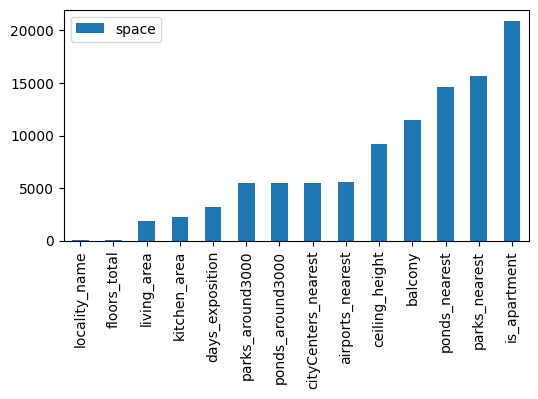

In [6]:
try:
    (
        (
            df.isna().sum()
            .to_frame()
            .rename(columns={0:'space'})
            .query('space > 0')
            .sort_values('space')
            .plot(kind = 'bar', figsize=(6,3))
            
            )
        )
except: 
    print ('Пропусков нет')

### Предобработка данных

In [7]:
#Поиск явных дубликатов
df.duplicated().sum()
#явных дубликатов нет

0

In [8]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Данные о потолках по 9.2 тыс квартир отсутствуют. Доля существенная, поэтому заполним пропуски медианой

In [9]:
#Высота потолка: Т.к. большинство значений находятся в интервале от 2.52 до 2.8 заполним пропуски медианой
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].median())


Установить населенный пункт исходя из других параметров не получится. Очистим датасет от строк, где не указан город

In [10]:
print ('Количество квартир до фильтрации:', len(df))
df_good = df.dropna(subset=['locality_name','floors_total']) #эти поля заполнить не удастся и в них не так много данных, поэтому отбрасываем
print ('Количество квартир после фильтрации:', len(df_good))

Количество квартир до фильтрации: 23699
Количество квартир после фильтрации: 23565


In [11]:
df_good.corr()['living_area']['total_area']

0.9397711143610353

Жилая площадь коррелирует с общей площадью, найдем коэффициент:

In [12]:
koef = df_good[df_good['living_area'] > 0]['living_area'].sum()/df_good[df_good['living_area'] > 0]['total_area'].sum()
print(koef)

0.5736591515482824


В среднем размер жилой площади составляет 57% от общей площади заполним жилую площадь такими значениями

In [13]:
df_good['living_area'] = df_good['living_area'].fillna(df['total_area']*koef)
print(len(df_good))

23565


Очень часто встречается число 4783 в пропусках, посмотрим, проверим в одних и тех же ли они строках/скорее всего они принадлежат к одной группе

In [14]:
df_good[df_good['cityCenters_nearest'].isna()].isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment            4878
studio                     0
open_plan                  0
kitchen_area             706
balcony                 2697
locality_name              0
airports_nearest        5500
cityCenters_nearest     5501
parks_around3000        5500
parks_nearest           5500
ponds_around3000        5500
ponds_nearest           5501
days_exposition          864
dtype: int64

* Гипотеза подтвердилась 4783 незаполненных поля, не заполнены сразу в 7 полях.
* Есть предположение, что именно эти поля заполняли вручную.


In [15]:
print(df_good.isna().sum())
print('Количество оставшихся строк:', len(df_good))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64
Количество оставшихся строк: 23565


In [16]:
#Удаляем неявные дубликаты из названий населенных пунктов
bad_words = [
'поселок городского типа имени ',
'садоводческое некоммерческое товарищество ',
'посёлок городского типа имени ',
'посёлок городского типа имени ',
'поселок городского типа ',
'посёлок городского типа ',
'посёлок при железнодорожной станции ',
'городской поселок ',
'посёлок станции ',
'городской посёлок ', 
'садовое товарищество ', 
'коттеджный посёлок ', 
'посёлок коттеджный ', 
'поселок коттеджный ', 
'коттеджный поселок ', 
'поселок станции ',
'при железнодорожной станции ',
'поселок ',
'городской ',
'деревня ',
'посёлок ',
'поселок ',
'село ',
'имени ', 
'станции ',]

def locality_clean(x):
    
    for wrd in bad_words:
        if str(wrd) in str(x): return(x.replace(wrd,''))
    return(x)    

df_good['short_locality_name']=df_good['locality_name'].apply(locality_clean)
print('Кол-во уникальных населенных пунктов до преобразования: ', len(df_good['locality_name'].unique()))
print('Кол-во уникальных населенных пунктов после преобразования: ',len(df_good['short_locality_name'].sort_values().unique()))
#display(df_good['locality_name'].sort_values().unique())
#display(df_good['short_locality_name'].sort_values().unique())
print(len(df_good))

Кол-во уникальных населенных пунктов до преобразования:  364
Кол-во уникальных населенных пунктов после преобразования:  305
23565


* Если отбросить данные, где не заполнены поля, то получается, что замен нужно сделать гораздо меньше. 
* Посмотрим сколько локаций в этих группах

In [17]:
len(df_good[df_good['ponds_around3000'].isna()]['short_locality_name'].unique())

286

286 населенных пунктов находятся в этой небольшой группе. Вывод: отбрасывать эти данные мы не будем, просто объединим их в отдельную группу. Скорее всего эти данные собирали люди, поэтому они и не смогли указать расстояния. Другие параметры мы можем использовать.

### Посчитайте и добавьте в таблицу новые столбцы

In [18]:
df_good['price_1m']=df_good['last_price']/df_good['total_area']
df_good['first_day_exposition']=pd.to_datetime(df_good['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S') #Меняем тип данных на дату
df_good['exposition_month_week_day'] = df_good['first_day_exposition'].dt.day_of_week
df_good['exposition_month'] = df_good['first_day_exposition'].dt.month
df_good['exposition_year'] = df_good['first_day_exposition'].dt.year
def last_floor(row):
    if row['floor'] == row['floors_total']: return('last')
    elif row['floor'] == 1: return('first')
    else: return ('other')
df_good['floor_type'] = df_good.apply(last_floor, axis=1)
df_good['cityCenters_nearest_km'] = df_good['cityCenters_nearest']/1000
df_good.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,short_locality_name,price_1m,exposition_month_week_day,exposition_month,exposition_year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,2.0,755.0,NaN,Санкт-Петербург,120370.370370,3,3,2019,other,16.028
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,NaN,...,0.0,NaN,81.0,Шушары,82920.792079,1,12,2018,first,18.603
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,NaN,...,2.0,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,other,13.933
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,91.211805,9,NaN,...,3.0,234.0,424.0,Санкт-Петербург,408176.100629,4,7,2015,other,6.800
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,1.0,48.0,121.0,Санкт-Петербург,100000.000000,1,6,2018,other,8.098


Построим гистограммы параметров

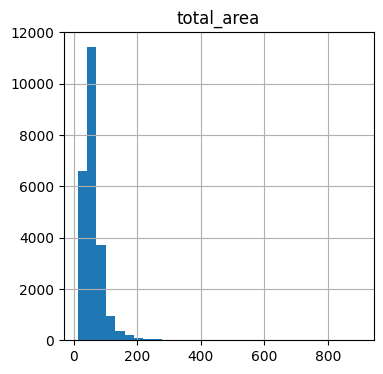

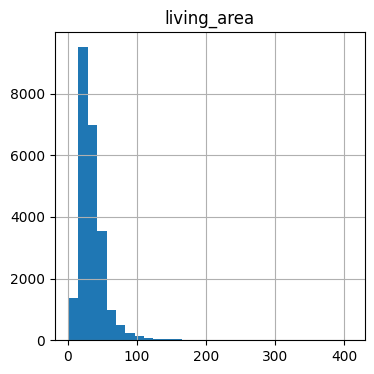

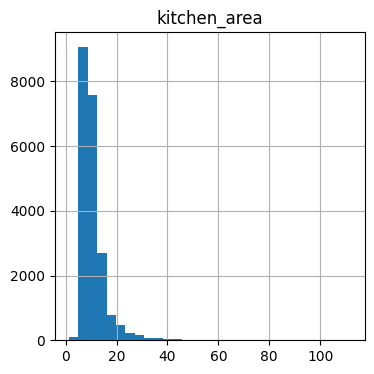

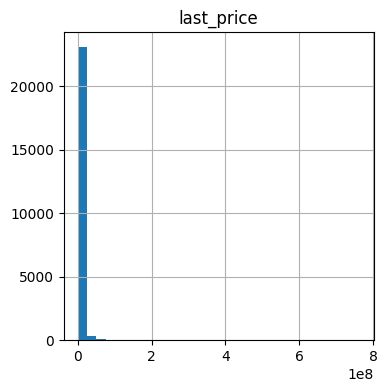

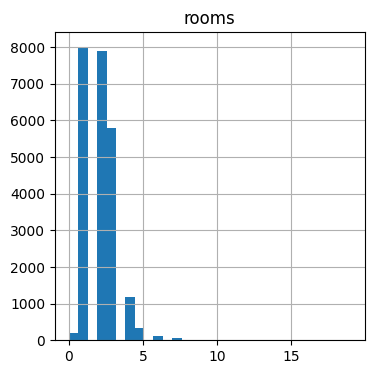

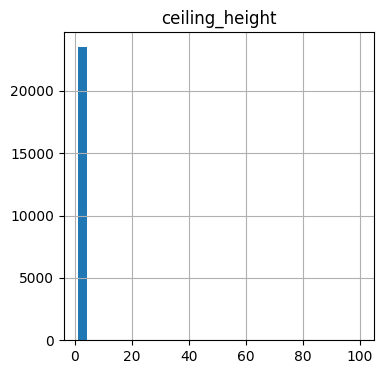

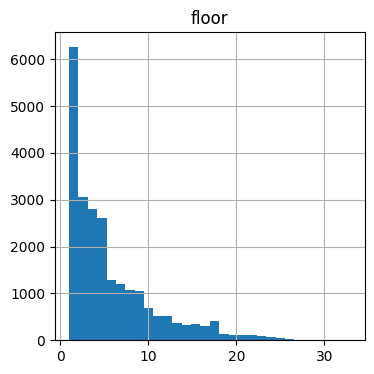

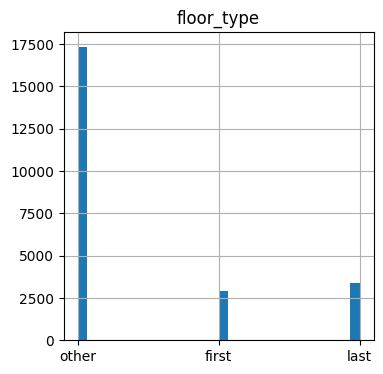

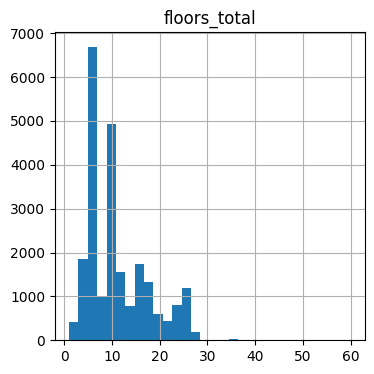

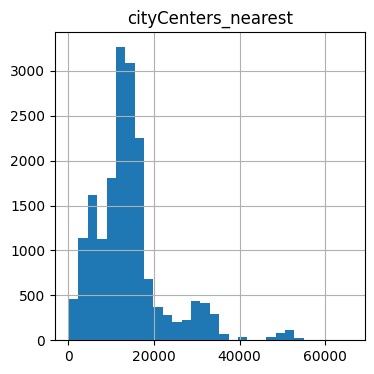

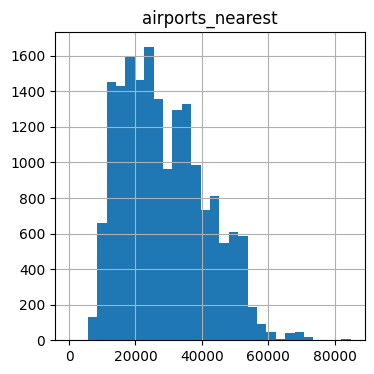

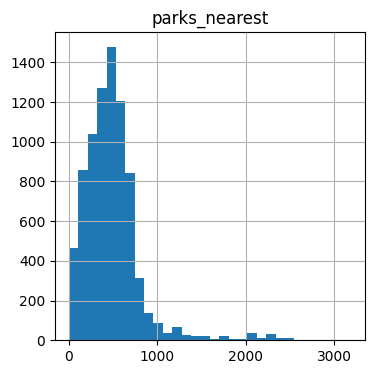

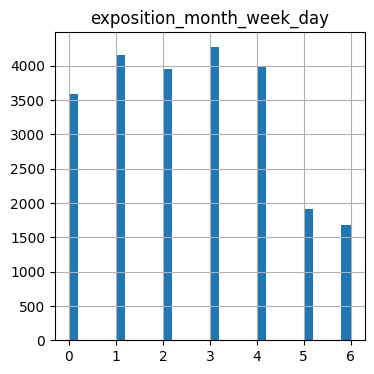

In [19]:
params = [
    'total_area',
    'living_area',
    'kitchen_area',
    'last_price', 
    'rooms',
    'ceiling_height',
    'floor',
    'floor_type',
    'floors_total',
    'cityCenters_nearest',
    'airports_nearest',
    'parks_nearest',
    'exposition_month_week_day'
    ]
for par in params:
    df_good[par].hist(bins = 30,figsize=(4,4))
    plt.title(par)
    plt.show()

Итого оставим в датасете: 

* Общая площадь От 25 до 200м
* Жилая площадь От 2 до 150м
* Цена менее 40 млн
* Комнат от 1 до 6
* Площадь кухни < 35 м
* Потолки от 1.5 до 5 м

In [20]:
print ('Текущий размер датасета:', len(df_good))

Текущий размер датасета: 23565


In [21]:

df_good = df_good[(
    (df_good['total_area']>=25)&
    (df_good['total_area']<200)&
    (df_good['living_area']<150)&
    (df_good['last_price']<=40000000)&
    (df_good['rooms']>0)&
    (df_good['rooms']<=6)&
    (df_good['kitchen_area']<35)&
    (df_good['ceiling_height']>=1.5)&
    (df_good['ceiling_height']<5))]

print('Размер датасета после фильтрации:', len(df_good))

Размер датасета после фильтрации: 20810


## Выводы по итогам предобработки данных
* Изначально в датасете было 23699 строк
* После фильтрации осталось 20810 (удалены аномальновысокие значения и неполные данные по ключевым полям)
* Около 5000 строк не заполнены сразу по нескольким столбцам. Было установлено, что это одни и те же объекты. В основном расположенные в небольших городах, селах.

### Датасет готов к анализу

### Проведите исследовательский анализ данных

In [22]:
# Посчитаем коэффициенты корреляции
phik_overview = df_good[params].phik_matrix()
cor = pd.DataFrame(df_good[params].corr())
phik_overview['cor'] = cor['last_price']
phik_overview.loc[:,['last_price','cor']].sort_values('last_price',ascending = False)

interval columns not set, guessing: ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'exposition_month_week_day']


,last_price,cor
last_price,1.000000,1.000000
total_area,0.764275,0.764855
living_area,0.693031,0.664018
kitchen_area,0.565146,0.560845
cityCenters_nearest,0.467734,-0.342394
rooms,0.455735,0.476763
ceiling_height,0.446795,0.413277
airports_nearest,0.223838,-0.038652
floors_total,0.185957,0.091708
floor_type,0.171457,NaN


* Самая высокая связь стоимости с площадью жилой, общей и кухни
* Количество комнат также оказывает сильное влияние
* Далее размер кухни
* Коэффициенты по остальным параметрам низки, но мы посмотрим детальнее

Проверим связи более детально:

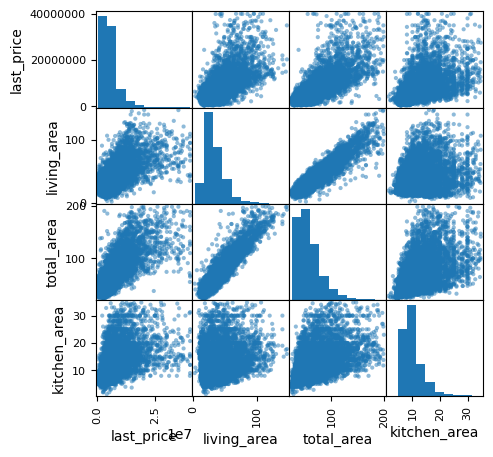

In [23]:
pd.plotting.scatter_matrix(df_good[['last_price','living_area','total_area','kitchen_area']], figsize=(5, 5)) #параметры площади скорее всего будут коррелировать между собой, поэтому сразу оценим их влияния на стоимость
plt.show()

* Ранее мы уже видели, что жилая площадь и общая почти полностью коррелируют между собой
* А вот кухня значительно слабее связана с другими метриками, поэтому ее рассмотрим отдельно

Посмотрим детальнее влияние площади и жил площади на стоимость
Сделаем сегментацию и построим гистограмму

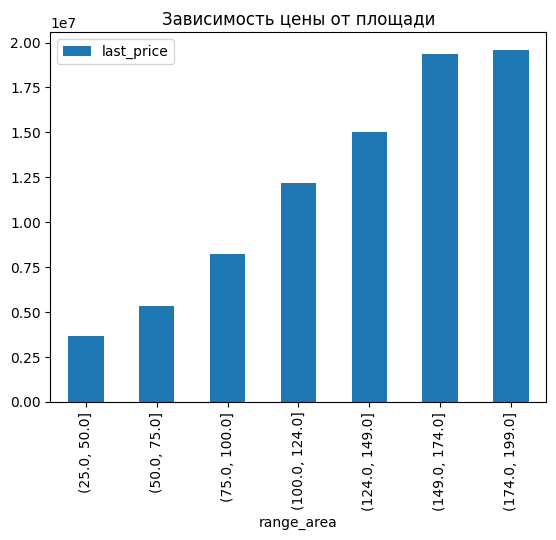

In [24]:
df_good['range_area']=pd.cut(df_good['total_area'], bins = 7, precision = 0)
df_good.pivot_table(index = 'range_area', values= 'last_price', aggfunc='median').plot(kind = 'bar')
plt.title('Зависимость цены от площади')
plt.show()

* До 210 кв. м цена растет почти линейно
* Выше растет не так сильно

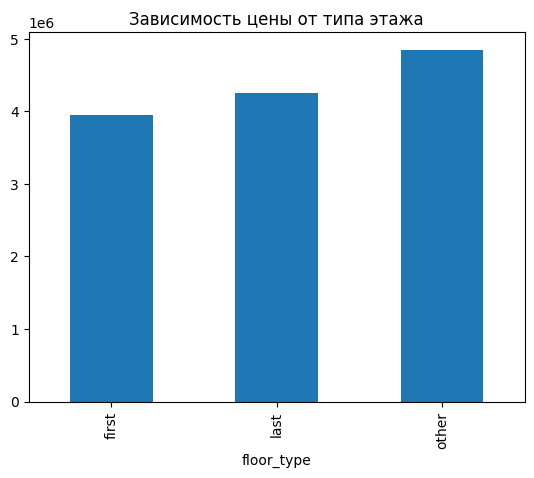

In [25]:
df_good.groupby('floor_type')['last_price'].median().plot(kind = 'bar')
plt.title('Зависимость цены от типа этажа')
plt.show()

* Первый этаж значительно дешевле двух остальных
* Последний стоит дешевле, чем не последний и не первый

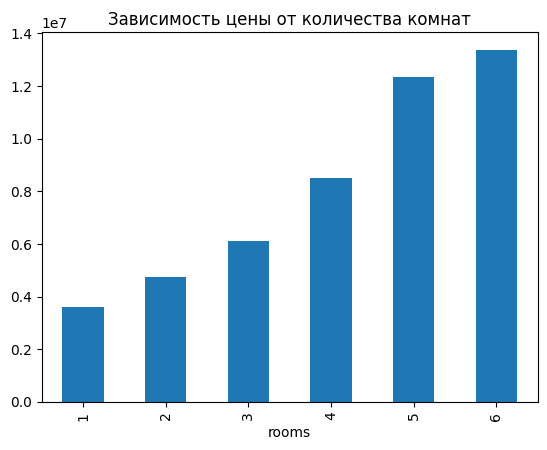

In [26]:
df_good.groupby('rooms')['last_price'].median().plot(kind = 'bar')
plt.title('Зависимость цены от количества комнат')
plt.show()

* График напоминает мультипликативный тренд, каждая последующая комната существенно увеличивает стоимость.
* Разница между 1 и 2 комнатной квартирой незначительна

Сделаем интервалы для кухни

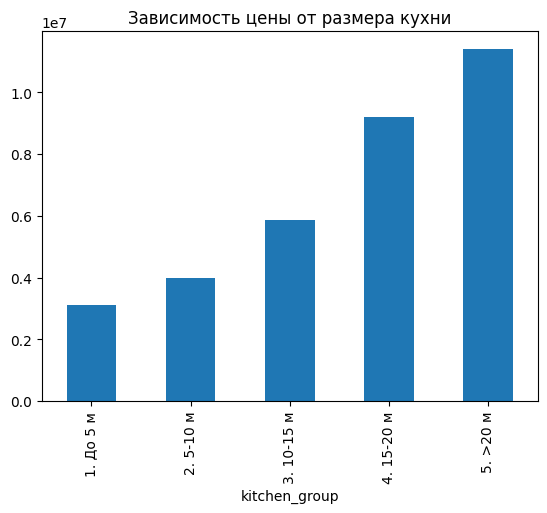

In [27]:
def kitchen(x):
    if 0 < x <= 5: return ('1. До 5 м')
    elif 5 < x <= 10: return ('2. 5-10 м')
    elif 10 < x <= 15: return ('3. 10-15 м')    
    elif 15 < x <= 20: return ('4. 15-20 м')
    else: return ('5. >20 м')
df_good['kitchen_group']=df_good['kitchen_area'].apply(kitchen)
df_good.groupby('kitchen_group')['last_price'].median().plot(kind = 'bar')
plt.title('Зависимость цены от размера кухни')
plt.show()

* Аналогичная ситуация как и с комнатами.
* Квартиру с кухней до 5 метров можно купить дешевле 

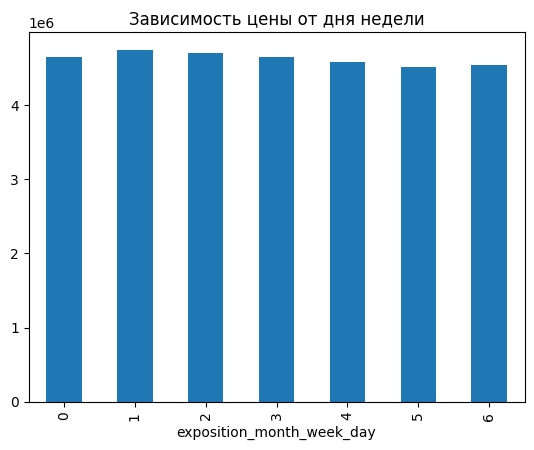

In [28]:
df_good.groupby('exposition_month_week_day')['last_price'].median().plot(kind = 'bar')
plt.title('Зависимость цены от дня недели')
plt.show()

Существенной зависимости стоимости квартиры от дня недели не выявлено

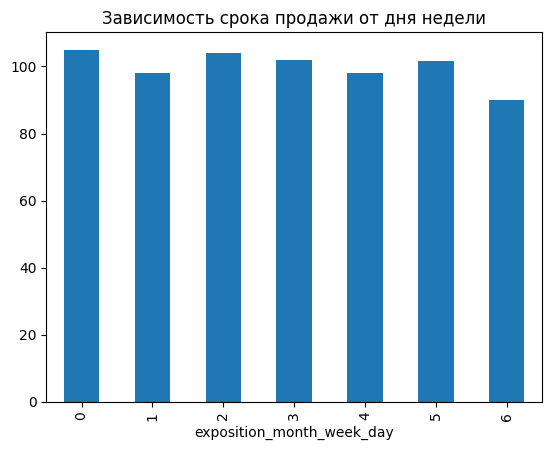

In [29]:
df_good.groupby('exposition_month_week_day')['days_exposition'].median().plot(kind = 'bar')
plt.title('Зависимость срока продажи от дня недели')
plt.show()

А вот на срок продажи день недели влияент.
Квартиры, которые выставляют в понедельник продаются на 10 дней дольше.

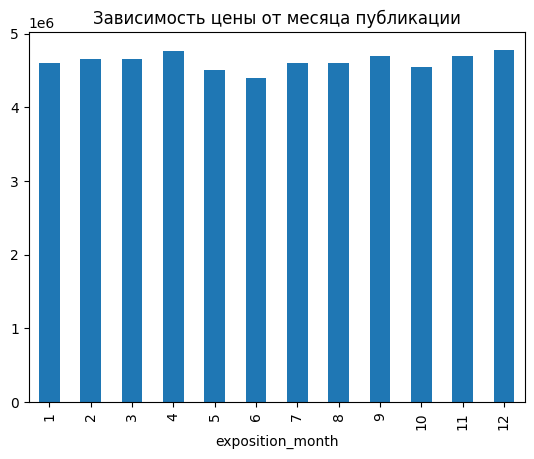

In [30]:
df_good.groupby('exposition_month')['last_price'].median().plot(kind = 'bar')
plt.title('Зависимость цены от месяца публикации')
plt.show()

Существенных отличий не выявлено

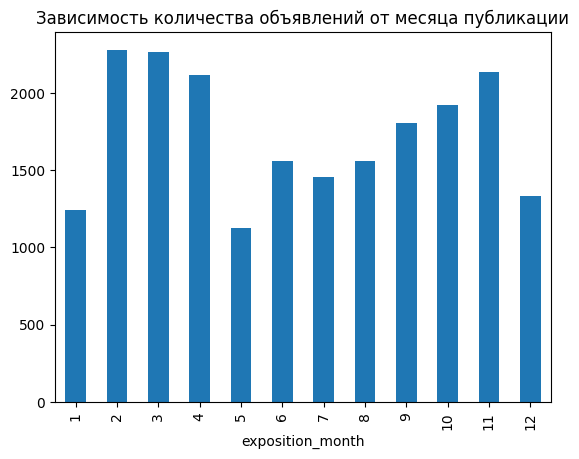

In [31]:
df_good.groupby('exposition_month')['last_price'].count().plot(kind = 'bar')
plt.title('Зависимость количества объявлений от месяца публикации')
plt.show()

В вот здесь явно видно, что основное количество объявлений публикуется с февраля по апрель и в ноябре.
Меньше всего - в мае.

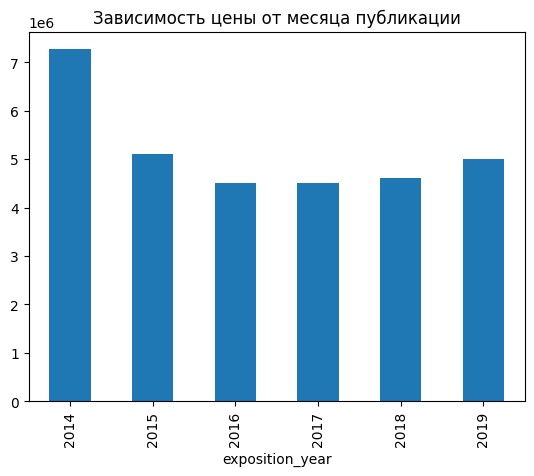

In [32]:
df_good.groupby('exposition_year')['last_price'].median().plot(kind = 'bar')
plt.title('Зависимость цены от месяца публикации')
plt.show()

* Дороже всего квартиры продавались в 2014 году
* В период 2016 есть небольшой рост, но больше похоже на стогнацию

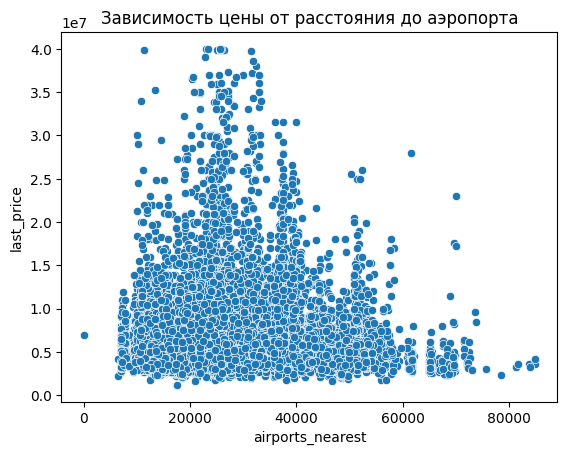

In [33]:
sns.scatterplot(x = df_good['airports_nearest'], y= df_good['last_price'])
plt.title('Зависимость цены от расстояния до аэропорта')
plt.show()

Есть всплеск в стоимости в интервале от 20 до 30 км.
Здесь расположена основная часть дорогого жилья.

Основные данные по сроку продажи:
count    17973.000000
mean       183.455238
std        220.119277
min          1.000000
25%         44.000000
50%        100.000000
75%        236.000000
max       1580.000000
Name: days_exposition, dtype: float64


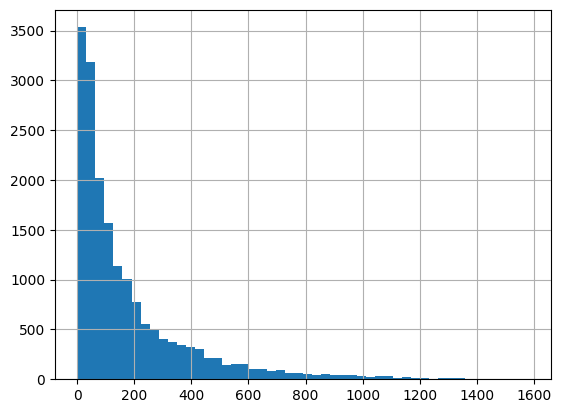

In [34]:
#Задание №1: посмотреть как быстро продавались квартиры
print('Основные данные по сроку продажи:')
print(df_good['days_exposition'].describe())
df_good['days_exposition'].hist(bins = 50)
plt.show()

* 50% квартир продаются от 45 до 232 дней.
* 75% квартир продаются менее, чем за 232 дня.
* Чаще всего срок продажи квартир занимает 95 дней. Быстрыми можно считать продажи с меньшим сроком.
* Будем считать, что квартиры, которые продаются больше года довольно редки и требуют внимания.


In [35]:
#Задание №3 "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`.
top10 = df_good.groupby('short_locality_name')['price_1m'].agg(['count','mean']).sort_values('count',ascending=False).head(10)
top10.sort_values('mean',ascending=False)

,count,mean
short_locality_name,,
Санкт-Петербург,13827,110609.920998
Пушкин,327,102871.947919
Кудрово,383,95154.530818
Парголово,289,90691.342386
Мурино,475,85537.438968
Шушары,395,78497.964277
Колпино,321,75129.845412
Всеволожск,355,68965.364068
Гатчина,293,68619.971416


* Больше всего квартир по самой высокой стоимости в СПб. Средняя стоимость 1 квадратного метра составляет 110,7 тыс рублей.
* Самое доступное жилье в Выборге почти в 2 раза дешевле, чем в Санкт-Петербурге - 58.2 тыс рублей.

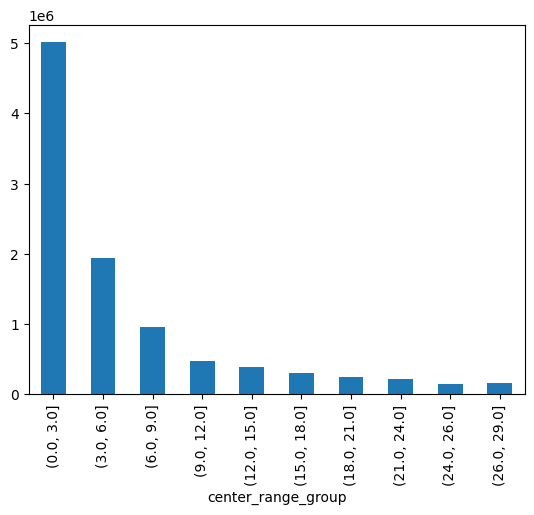

In [36]:
# Задание №4 выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
df_good_spb = df_good.query('short_locality_name == "Санкт-Петербург"')
df_good_spb['cost_1km_from_centre']=df_good_spb['last_price']/df_good_spb['cityCenters_nearest_km']
df_good_spb['center_range_group']=pd.cut(df_good_spb['cityCenters_nearest_km'],bins = 10, precision = 0)
df_good_spb.groupby('center_range_group')['cost_1km_from_centre'].median().dropna().plot(kind = 'bar', x='center_range_group',y='cost_1km_from_centre')
plt.show()


* Самая высокая цена метра у квартир, которые находятся на расстоянии менее 3 километров к центру города и составляет 5.6 млн рублей за квадратный метр.
* На расстоянии от 3 до 6 км стоимость падает более, чем в 2 раза и находится в районе 

# Общие выводы:
1. На стоимость квартиры больше всего влияют следующие параметры в порядке уменьшения веса:
   1. Общая площадь
   2. Жилая площадь (почти линейно коррелирует с общей площадью)
   3. Площадь кухни
   4. Расстояние до центра города
   5. Количество комнат
   6. Расстояние до аэропорта.

2. Дополнительные параметры, влияющие на стоимость:
   1. Первый и последний этажи стоят дешевле остальных
   2. День недели публикации объявления не влияет на стоимость, но влияет на срок продажи
   3. В 2014 году квартиры продовались дороже всего начиная с 2015 года цены существенно снизились 

Было установлено, что по небольшим городам данные не указаны. Детальная информация есть только по крупным городам.


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
   x    - общей площади;
   x    - жилой площади;
   x    - площади кухни;
   x    - количество комнат;
   x    - типа этажа, на котором расположена квартира (первый, последний, другой);
   x    - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод